In [1]:
import numpy as np
import dimarray as da
from matplotlib import pylab as plt
from matplotlib import ticker, cm, colors
import cmocean
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

import matplotlib.pyplot as pl

## TOC

* [1D](#first-bullet)
* [2D](#second-bullet)
* [change to ctrl](#3-bullet)
* [change to exp](#4-bullet)
* [close up  6K](#5-bullet)
* [close up 6K lpr and precip change](#6-bullet)

In [2]:
sia_e = 3.0
q =0.6
ssa_n = 3.0
GT_to_SLR=1/(1000*360)*1/12
output_proj = '/home/beckmann/mnt/cluhome/exp_pism/pdd_runs/projection_runs/4500m/'
spin_up =  '/home/beckmann/mnt/cluhome/exp_pism/pdd_runs/spin_up/4500m/paleo_1ka_0a_'+'sia_e_'+str(sia_e)+'_q_'+str(q)+'_ssa_n_'+str(ssa_n)+'/gris_4500m.nc'
bed_orig = '/home/beckmann/mnt/cluhome/exp_pism/my_first_runs/input_data/pism_Greenland_4500m_mcb_jpl_v_no_bath_plus_beddef.nc'
input_beds = '/home/beckmann/mnt/cluhome/icedata/pism_greenland_input/BedMachine/'
ftt_file =input_beds+'ftt_4500m.nc'
ctrl =  '/home/beckmann/mnt/cluhome/exp_pism/pdd_runs/spin_up/4500m/ctrl_sia_e_'+str(sia_e)+'_q_'+str(q)+'_ssa_n_'+str(ssa_n)+'/'

In [3]:
def title_fig_lin_vel_anom_bar(d,ax,vmin,vmax,clmap=None):    
    lev1 =one_fig_anom_varibale_linear(ax,d,vmin,vmax, clmap)
    cbar=f.colorbar(lev1,ticks=[vmin,d.values.min(),0,d.values.max(),vmax],label ='m',ax =ax,orientation='vertical')
    ax.set_title('ice velocity change',fontsize=fs-2)
    
def one_fig_anom_varibale_linear(ax,d,vmin,vmax,clmap=None):
    if clmap is not None:
        cay =ax.imshow(d.values[0,:],extent=(d.x.min(),d.x.max(),d.y.min(),d.y.max()),\
                       origin='lower',cmap=plt.get_cmap(clmap),\
                       vmin=vmin,vmax=vmax, norm=MidpointNormalize(vmin, vmax, 0.))
    else:
        cay =ax.imshow(d.values[0,:],extent=(d.x.min(),d.x.max(),d.y.min(),d.y.max()), \
                   origin='lower',cmap=cmocean.cm.ice,vmin=vmin,vmax=vmax)
        ax.contour(d.x,d.y,d.values[0,:],levels=[2000],colors='red')
    return cay
class MidpointNormalize(colors.Normalize):
    """Normalise the colorbar."""
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))
# ONLY grounded and floating ice
def diff_2d_exp_ctrl(i,vthk=500,vvel=50):
    vel0 = da.read_nc(ctrl+'gris_4500m.nc','velsurf_mag')
    vel1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','velsurf_mag')
    thk0 = da.read_nc(ctrl+'gris_4500m.nc','thk')
    thk1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','thk')

    f, ax = plt. subplots(1,2, figsize=(16, 8))
    msk0 = (m1.values[0,] == 2)
    mks00 = (m1.values[0,] ==3)

    # mth = thk1.values[0,] >100
    # msk = msk0 + mks00 +mth
    msk = msk0 + mks00 

    vel1.values[0,][~msk]=np.nan
    vel0.values[0,][~msk]=np.nan

    thk1.values[0,][~msk]=np.nan
    thk0.values[0,][~msk]=np.nan
    x=242
    ax[0].set_title('Velocity change '+files[i]+'- ctrl ')
    css=ax[0].imshow( vel1.values[0,]-vel0.values[0,] ,cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
    ax[0].plot((0,300),(x,x))
    levels2 = make_levels_own(100,1)
    ax[1].set_title('Thickness change')
    csc=ax[1].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vthk,vmax=vthk)

    # csc=ax[1].contourf(vel1.x,vel1.y,vel1.values[0,]-vel0.values[0,] ,levels =levels2,extend='both',cmap = "RdBu_r")
    f.colorbar(css, ax = ax[0])
    f.colorbar(csc, ax = ax[1])
    # ax3.
def diff_2d_exp_exp(j,i,vthk=500,vvel=50):
    vel0 = da.read_nc(output_proj+files[j]+'gris_4500.nc','velsurf_mag')
    vel1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','velsurf_mag')
    
    thk0 = da.read_nc(output_proj+files[j]+'gris_4500.nc','thk')
    thk1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','thk')

    f, ax = plt. subplots(1,2, figsize=(16, 8))
    msk0 = (m1.values[0,] == 2)
    mks00 = (m1.values[0,] ==3)

    # mth = thk1.values[0,] >100
    # msk = msk0 + mks00 +mth
    msk = msk0 + mks00 

    vel1.values[0,][~msk]=np.nan
    vel0.values[0,][~msk]=np.nan

    thk1.values[0,][~msk]=np.nan
    thk0.values[0,][~msk]=np.nan
    x=242
    ax[0].set_title('Velocity change '+files[i]+'-'+files[j])
    css=ax[0].imshow( vel1.values[0,]-vel0.values[0,] ,cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
    ax[0].plot((0,300),(x,x))
    levels2 = make_levels_own(100,1)
    ax[1].set_title('Thickness change')
    csc=ax[1].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vthk,vmax=vthk)

    # csc=ax[1].contourf(vel1.x,vel1.y,vel1.values[0,]-vel0.values[0,] ,levels =levels2,extend='both',cmap = "RdBu_r")
    f.colorbar(css, ax = ax[0])
    f.colorbar(csc, ax = ax[1])
    # ax3.
    
def title_fig_lin_vel_anom_bar(d,ax,vmin,vmax,clmap=None):    
    lev1 =one_fig_anom_varibale_linear(ax,d,vmin,vmax, clmap)
    cbar=f.colorbar(lev1,ticks=[vmin,d.values.min(),0,d.values.max(),vmax],label ='m',ax =ax,orientation='vertical')
    ax.set_title('ice velocity change',fontsize=fs-2)
    
def one_fig_anom_varibale_linear(ax,d,vmin,vmax,clmap=None):
    if clmap is not None:
        cay =ax.imshow(d.values[0,:],extent=(d.x.min(),d.x.max(),d.y.min(),d.y.max()),\
                       origin='lower',cmap=plt.get_cmap(clmap),\
                       vmin=vmin,vmax=vmax, norm=MidpointNormalize(vmin, vmax, 0.))
    else:
        cay =ax.imshow(d.values[0,:],extent=(d.x.min(),d.x.max(),d.y.min(),d.y.max()), \
                   origin='lower',cmap=cmocean.cm.ice,vmin=vmin,vmax=vmax)
        ax.contour(d.x,d.y,d.values[0,:],levels=[2000],colors='red')
    return cay
class MidpointNormalize(colors.Normalize):
    """Normalise the colorbar."""
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))
    
    
# ONLY grounded and floating ice
def diff_2d_exp_ctrl_thk_no(i,vthk=500,vvel=50,thk_no=5):
    '''Thickness below 5m is no ice'''
    vel0 = da.read_nc(ctrl+'gris_4500m.nc','velsurf_mag')
    vel1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','velsurf_mag')
    thk0 = da.read_nc(ctrl+'gris_4500m.nc','thk')
    thk1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','thk')

    f, ax = plt. subplots(1,2, figsize=(16, 8))
    msk0 = (m1.values[0,] == 2)
    mks00 = (m1.values[0,] ==3)

    mth = thk1.values[0,] >thk_no
    #msk_b = msk0 + mks00 
    msk =  mth
    #msk = msk0 + mks00 

    vel1.values[0,][~msk]=np.nan
    vel0.values[0,][~msk]=np.nan

    thk1.values[0,][~msk]=np.nan
    thk0.values[0,][~msk]=np.nan
    x=242
    ax[0].set_title('Velocity change '+files[i]+'- ctrl ')
    css=ax[0].imshow( vel1.values[0,]-vel0.values[0,] ,cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
    ax[0].plot((0,300),(x,x))
    levels2 = make_levels_own(100,1)
    ax[1].set_title('Thickness change')
    csc=ax[1].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vthk,vmax=vthk)

    # csc=ax[1].contourf(vel1.x,vel1.y,vel1.values[0,]-vel0.values[0,] ,levels =levels2,extend='both',cmap = "RdBu_r")
    f.colorbar(css, ax = ax[0])
    f.colorbar(csc, ax = ax[1])
    # ax3.
def diff_2d_exp_exp(j,i,vthk=500,vvel=50):
    vel0 = da.read_nc(output_proj+files[j]+'gris_4500.nc','velsurf_mag')
    vel1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','velsurf_mag')
    
    thk0 = da.read_nc(output_proj+files[j]+'gris_4500.nc','thk')
    thk1 = da.read_nc(output_proj+files[i]+'gris_4500.nc','thk')

    f, ax = plt. subplots(1,2, figsize=(16, 8))
    msk0 = (m1.values[0,] == 2)
    mks00 = (m1.values[0,] ==3)

    # mth = thk1.values[0,] >100
    # msk = msk0 + mks00 +mth
    msk = msk0 + mks00 

    vel1.values[0,][~msk]=np.nan
    vel0.values[0,][~msk]=np.nan

    thk1.values[0,][~msk]=np.nan
    thk0.values[0,][~msk]=np.nan
    x=242
    ax[0].set_title('Velocity change '+files[i]+'-'+files[j])
    css=ax[0].imshow( vel1.values[0,]-vel0.values[0,] ,cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-1*vvel,vmax=vvel)
    ax[0].plot((0,300),(x,x))
    levels2 = make_levels_own(100,1)
    ax[1].set_title('Thickness change')
    csc=ax[1].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-1*vthk,vmax=vthk)

    # csc=ax[1].contourf(vel1.x,vel1.y,vel1.values[0,]-vel0.values[0,] ,levels =levels2,extend='both',cmap = "RdBu_r")
    f.colorbar(css, ax = ax[0])
    f.colorbar(csc, ax = ax[1])
    # ax3.

In [4]:
# def give_diff(var):
#     thk0 = da.read_nc(output_proj+files[0]+'gris_4500.nc',var)
#     thk1 = da.read_nc(output_proj+files[1]+'gris_4500.nc',var)
#     return(thk1.values[0,]-thk0.values[0,])

def give_diff(var,i):
    thk0 = da.read_nc(ctrl+'gris_4500m.nc',var)
    thk1 = da.read_nc(output_proj+files[i]+'gris_4500.nc',var)
    return(thk1.values[0,]-thk0.values[0,])
def give_var(var,i=1):
    thk1 = da.read_nc(output_proj+files[i]+'gris_4500.nc',var)
    return(thk1.values[0,])

In [213]:
files = ['proj_step6K_330a_no_mass/','proj_step6K_330a/','proj_step6K_330a_nodyn_but_mass/']
tfile ='ts_gris_4500.nc'
slp = 'sea_level_rise_potential'
time = np.arange(1970,2300)
sec_to_year = 60*60*24*365

## Test no mass 

In [215]:
d = da.read_nc( '/home/beckmann/mnt/cluhome/icedata/MAR_SMB/MARv3.9/ISMIP6/proj_monthly/results/'+\
'clim_mean_pism_ST_Precip_4500m.nc')


d2 = da.read_nc(output_proj+files[0]+'extra_gris_4500.nc')
d3 = da.read_nc(output_proj+files[1]+'extra_gris_4500.nc')

/home/beckmann/virtualenvironment/vpy3/local/lib/python3.6/site-packages/dimarray/io/nc.py:624: RuntimeWarning: 'bnds' dimension not found, define integer range
  warnings.warn(msg, RuntimeWarning)
/home/beckmann/virtualenvironment/vpy3/local/lib/python3.6/site-packages/dimarray/io/nc.py:624: RuntimeWarning: 'nv' dimension not found, define integer range
  warnings.warn(msg, RuntimeWarning)


In [7]:
d

Dataset of 4 variables
0 / time (12): 0.0 to 330.0
1 / bnds (2): 0 to 1
2 / x (352): -676400.0 to 903100.0
3 / y (608): -3369350.0 to -637850.0
time_bnds: ('time', 'bnds')
polar_stereographic: 1
air_temp: ('time', 'y', 'x')
precipitation: ('time', 'y', 'x')

In [8]:
d2

Dataset of 12 variables
0 / time (12): 2592000.0 to 31104000.0
1 / x (352): -676400.0 to 903100.0
2 / y (608): -3369350.0 to -637850.0
3 / nv (2): 0 to 1
pism_config: -1
run_stats: nan
timestamp: ('time',)
air_temp_snapshot: ('time', 'y', 'x')
climatic_mass_balance: ('time', 'y', 'x')
height_above_flotation: ('time', 'y', 'x')
ice_surface_temp: ('time', 'y', 'x')
surface_accumulation_flux: ('time', 'y', 'x')
surface_melt_flux: ('time', 'y', 'x')
surface_runoff_flux: ('time', 'y', 'x')
thk: ('time', 'y', 'x')
time_bounds: ('time', 'nv')

In [9]:
d2['air_temp_snapshot'].values.shape

(12, 608, 352)

In [10]:
d2

Dataset of 12 variables
0 / time (12): 2592000.0 to 31104000.0
1 / x (352): -676400.0 to 903100.0
2 / y (608): -3369350.0 to -637850.0
3 / nv (2): 0 to 1
pism_config: -1
run_stats: nan
timestamp: ('time',)
air_temp_snapshot: ('time', 'y', 'x')
climatic_mass_balance: ('time', 'y', 'x')
height_above_flotation: ('time', 'y', 'x')
ice_surface_temp: ('time', 'y', 'x')
surface_accumulation_flux: ('time', 'y', 'x')
surface_melt_flux: ('time', 'y', 'x')
surface_runoff_flux: ('time', 'y', 'x')
thk: ('time', 'y', 'x')
time_bounds: ('time', 'nv')

In [11]:
# fig = plt.figure(1,figsize =(16,8))
# # set up subplot grid
# gridspec.GridSpec(2,2)

# # large subplot
# ax =plt.subplot2grid((2,2), (0,0),colspan=1, rowspan=1)
# ax2 = plt.subplot2grid((2,2), (0,1),colspan=1, rowspan=1)
# ax3= plt.subplot2grid((2,2), (1,0),colspan=2, rowspan=1)

# # small subplot 1

# css =ax.imshow(d['air_temp'].values.mean(axis =0),origin = 'lower',vmin =np.nanmin(d['air_temp'].values))
# cs2 =ax2.imshow(d2['air_temp_snapshot'].values.mean(axis =0),origin = 'lower',vmin =np.nanmin(d['air_temp'].values)+6)
# # f.colorbar(css, ax = ax)
# # f.colorbar(cs2, ax = ax2)
# ax.scatter(150,300,color='red')
# ax2.scatter(150,300,color='red')

In [12]:
mm = np.linspace(1,12,12)
mm

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

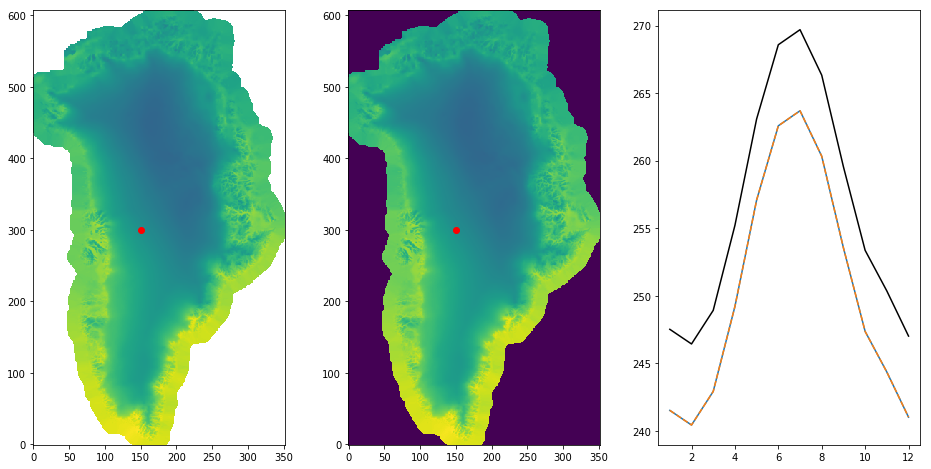

In [13]:
fig, (ax,ax2,ax3) = plt.subplots(1,3,figsize =(16,8))


# small subplot 1

css =ax.imshow(d['air_temp'].values.mean(axis =0),origin = 'lower',vmin =np.nanmin(d['air_temp'].values))
cs2 =ax2.imshow(d2['air_temp_snapshot'].values.mean(axis =0),origin = 'lower',vmin =np.nanmin(d['air_temp'].values)+6)
# f.colorbar(css, ax = ax)
# f.colorbar(cs2, ax = ax2)
y = 300
x = 150
ax.scatter(x,y,color='red')
ax2.scatter(x,y,color='red')
ax3.plot(mm,d['air_temp'].values[:,y,x])
# ax3.plot(mm,d2['air_temp_snapshot'].values[:,y,x])
ax3.plot(mm,d2['ice_surface_temp'].values[:,y,x],'k')
ax3.plot(mm,d2['ice_surface_temp'].values[:,y,x]-6,'--')
# ax3.plot(mm,d2['air_temp_snapshot'].values[:,y,x]-6, '--')


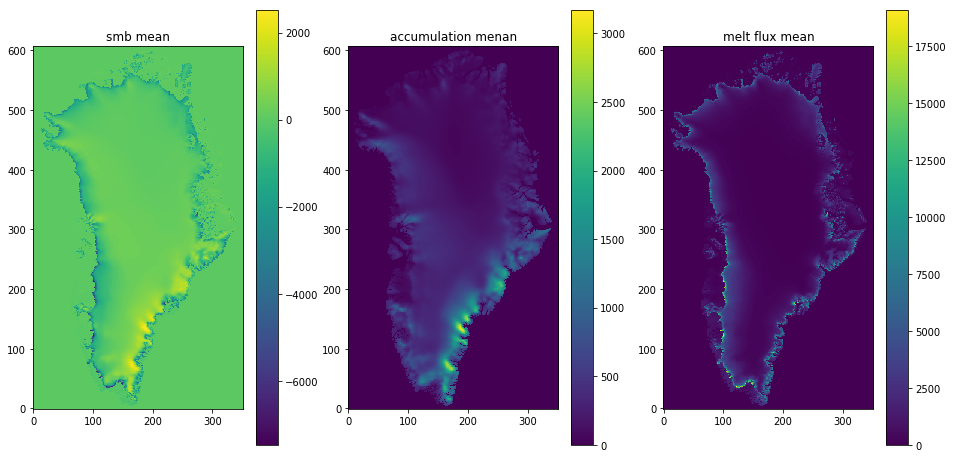

In [15]:
fig, (ax,ax2,ax3) = plt.subplots(1,3,figsize =(16,8))


# small subplot 1

css =ax.imshow(d2['climatic_mass_balance'].values.mean(axis =0),origin = 'lower')
cs2 =ax2.imshow(d2['surface_accumulation_flux'].values.mean(axis =0),origin = 'lower')
cs3 =ax3.imshow(d2['surface_melt_flux'].values.mean(axis =0),origin = 'lower')
fig.colorbar(css, ax = ax)
ax.set_title('smb mean')
ax2.set_title('accumulation menan')
ax3.set_title('melt flux mean')
fig.colorbar(cs2, ax = ax2)
fig.colorbar(cs3, ax = ax3)
# y = 300
# x = 150
# ax.scatter(x,y,color='red')
# ax2.scatter(x,y,color='red')
# ax3.plot(mm,d['air_temp'].values[:,y,x])
# # ax3.plot(mm,d2['air_temp_snapshot'].values[:,y,x])
# ax3.plot(mm,d2['ice_surface_temp'].values[:,y,x],'k')
# ax3.plot(mm,d2['ice_surface_temp'].values[:,y,x]-6,'--')
# ax3.plot(mm,d2['air_temp_snapshot'].values[:,y,x]-6, '--')


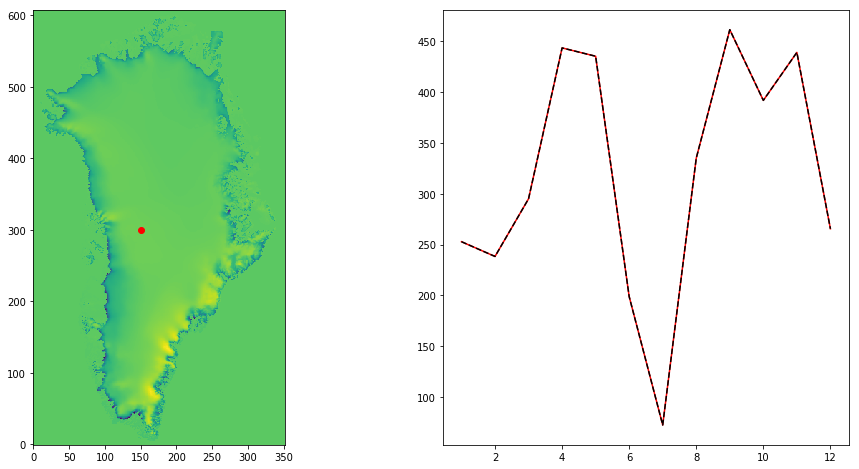

In [217]:
fig, (ax2,ax3) = plt.subplots(1,2,figsize =(16,8))


# small subplot 1

var = 'climatic_mass_balance'
cs2 =ax2.imshow(d2[var].values.mean(axis =0),origin = 'lower')
# f.colorbar(css, ax = ax)
# f.colorbar(cs2, ax = ax2)
y = 300
x = 150
# ax.scatter(x,y,color='red')
ax2.scatter(x,y,color='red')
ax3.plot(mm,d2[var].values[:,y,x],'red')
ax3.plot(mm,d3[var].values[:,y,x],'k--')
# # ax3.plot(mm,d2['air_temp_snapshot'].values[:,y,x])
# ax3.plot(mm,d2['ice_surface_temp'].values[:,y,x],'k')
# ax3.plot(mm,d2['ice_surface_temp'].values[:,y,x]-6,'--')
# # ax3.plot(mm,d2['air_temp_snapshot'].values[:,y,x]-6, '--')


In [17]:
t2 = da.read_nc(output_proj+files[0]+'ts_gris_4500.nc')

In [18]:
mask_file = da.read_nc(ftt_file)

/home/beckmann/virtualenvironment/vpy3/local/lib/python3.6/site-packages/dimarray/io/nc.py:624: RuntimeWarning: 'nv4' dimension not found, define integer range
  warnings.warn(msg, RuntimeWarning)


In [19]:
mask =mask_file['ftt_mask'].values == 0

In [20]:
mask_bed = da.read_nc(bed_orig, 'mask')

In [21]:
mask_grounded = mask_bed.values == 2


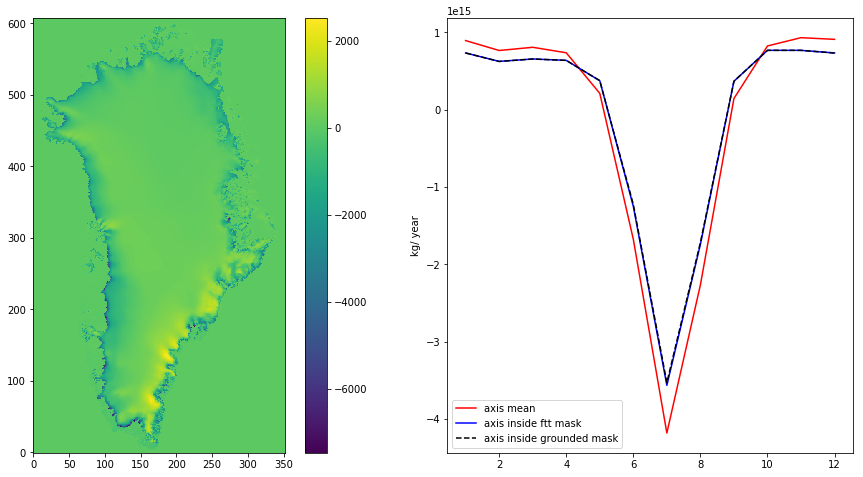

In [22]:
fig, (ax2,ax3) = plt.subplots(1,2,figsize =(16,8))


# small subplot 1

var = 'climatic_mass_balance'
cs2 =ax2.imshow(d2[var].values.mean(axis =0),origin = 'lower')
# f.colorbar(css, ax = ax)
fig.colorbar(cs2, ax = ax2)
y = 300
x = 150
dx = 4500
dy =4500
    
# ax.scatter(x,y,color='red')
# ax2.scatter(x,y,color='red')
ax3.plot(mm,d2[var].values[:].sum(axis=(1,2))*dx*dy,'red', label = 'axis mean')
ax3.plot(mm,d2[var].values[:,mask].sum(axis=1)*dx*dy,'blue', label = 'axis inside ftt mask')
ax3.plot(mm,d2[var].values[:,mask_grounded].sum(axis=1)*dx*dy,'k--', label = 'axis inside grounded mask')

ax3.set_ylabel('kg/ year')
# ax3.plot(mm,t2['tendency_of_ice_mass_due_to_surface_mass_flux'].values)
# # ax3.plot(mm,d2['air_temp_snapshot'].values[:,y,x])
# ax3.plot(mm,d2['ice_surface_temp'].values[:,y,x],'k')
# ax3.plot(mm,d2['ice_surface_temp'].values[:,y,x]-6,'--')
# # ax3.plot(mm,d2['air_temp_snapshot'].values[:,y,x]-6, '--')
ax3.legend()

## 1D <a class="anchor" id="first-bullet"></a>

In [23]:
files

['proj_step6K_330a_no_mass/', 'proj_step6K_330a/']

In [163]:


d2 = da.read_nc(output_proj+files[0]+'extra_gris_4500.nc')

/home/beckmann/virtualenvironment/vpy3/local/lib/python3.6/site-packages/dimarray/io/nc.py:624: RuntimeWarning: 'nv' dimension not found, define integer range
  warnings.warn(msg, RuntimeWarning)


In [218]:
t0 = da.read_nc(output_proj+files[0]+'ts_gris_4500.nc')
tdyn = da.read_nc(output_proj+files[2]+'ts_gris_4500.nc')

In [220]:
tdyn['sea_level_rise_potential']

dimarray: 12 non-null elements (0 null)
0 / time (12): 2592000.0 to 31104000.0
array([7.59891551, 7.59905762, 7.5992063 , 7.59934972, 7.59942397,
       7.59909253, 7.59820325, 7.59774896, 7.59781496, 7.59798752,
       7.59816134, 7.59832814])

In [165]:
t300 = da.read_nc(output_proj+files[1]+'ts_gris_4500.nc')
t300

Dataset of 40 variables
0 / time (330): 31104000.0 to 10264320000.0
1 / nv (2): 0 to 1
pism_config: 0
run_stats: 0.0
time_bounds: ('time', 'nv')
basal_mass_flux_floating: ('time',)
basal_mass_flux_grounded: ('time',)
dt: ('time',)
ice_area_glacierized: ('time',)
ice_area_glacierized_cold_base: ('time',)
ice_area_glacierized_floating: ('time',)
ice_area_glacierized_grounded: ('time',)
ice_area_glacierized_temperate_base: ('time',)
ice_enthalpy: ('time',)
ice_enthalpy_glacierized: ('time',)
ice_mass: ('time',)
ice_mass_glacierized: ('time',)
ice_volume: ('time',)
ice_volume_cold: ('time',)
ice_volume_glacierized: ('time',)
ice_volume_glacierized_cold: ('time',)
ice_volume_glacierized_floating: ('time',)
ice_volume_glacierized_grounded: ('time',)
ice_volume_glacierized_temperate: ('time',)
ice_volume_temperate: ('time',)
limnsw: ('time',)
liquified_ice_flux: ('time',)
max_diffusivity: ('time',)
max_hor_vel: ('time',)
sea_level_rise_potential: ('time',)
surface_accumulation_rate: ('time',)

In [166]:
A_ocean_m = 362.5*10**6*10**6
rho_ice = 910.0 
rho_fw =1000
rho_sw =1028.0

In [167]:
m3_to_slr= rho_ice/(rho_fw*A_ocean_m)

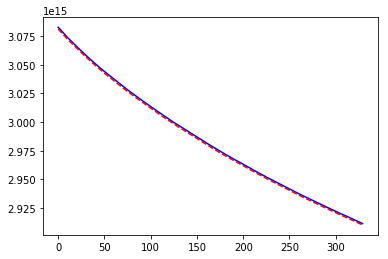

In [168]:
plt.plot(t300['ice_volume_glacierized'].values, 'b')
plt.plot(t300['ice_volume_glacierized_grounded'].values, 'r--')


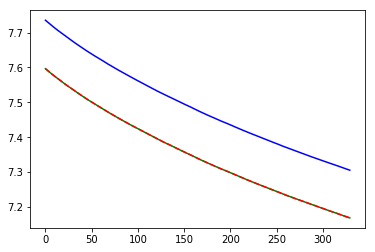

In [169]:
plt.plot(t300['ice_volume_glacierized_grounded'].values*m3_to_slr, 'b')
plt.plot(t300['limnsw'].values*m3_to_slr/rho_ice, 'green')
pl.plot(t300['sea_level_rise_potential'].values, 'r--')

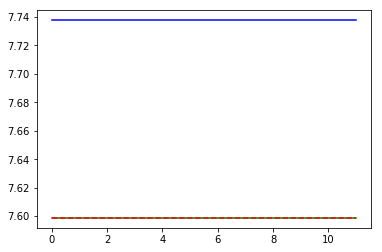

In [170]:
plt.plot(t0['ice_volume_glacierized_grounded'].values*m3_to_slr, 'b')
plt.plot(t0['limnsw'].values*m3_to_slr/rho_ice, 'green')
pl.plot(t0['sea_level_rise_potential'].values, 'r--')

In [271]:
H = d2['thk'].values[0,:]

In [272]:
m_glacier = H >= 10

In [276]:
d_0e = da.read_nc(output_proj +files[0]+'gris_4500.nc','mask')
m_grounded_2 =d_0e.values[0,:] ==2
m_float_2  = d_0e.values[0,:] ==3

In [282]:
H_ground = H[m_grounded_2]
m_thin_ground = H_ground < 10
H_ground[m_thin_ground] = 0.

In [277]:
m_ground_glacier = m_grounded_2 + m_glacier

In [ ]:
tdyn['ice_area_glacierized'].values[i]

In [275]:
t0['ice_volume_glacierized'].values[0] - t0['ice_volume_glacierized_grounded'].values[0] -t0['ice_volume_glacierized_floating'].values[0]

0.1552734375

In [279]:
t0['ice_volume_glacierized_grounded'].values[0] - dx*dy*H[m_ground_glacier].sum()

-617729550064.0

In [283]:
t0['ice_volume_glacierized_grounded'].values[0] - dx*dy*H_ground.sum()

-185550064.0

In [ ]:
i =0
tdyn['ice_volume_glacierized'].values[i] - tdyn['ice_volume_glacierized_grounded'].values[i] -tdyn['ice_volume_glacierized_floating'].values[i]

### check if area is right

In [329]:
h_gl = H < 10

In [343]:
type(H[0][0])

numpy.float32

In [336]:
np.size(H[~h_gl])*dx*dy- t0['ice_area_glacierized'].values[0]

0.0

In [337]:
np.sum(H[~h_gl])*dx*dy- t0['ice_volume_glacierized'].values[0]

-12187610.0

In [341]:
-12187610.0/t0['ice_volume_glacierized'].values[0]

-3.953296227982256e-09

In [339]:
np.sum(H[~h_gl])*rho_ice*dx*dy- t0['ice_mass_glacierized'].values[0]

-11090724864.0

In [340]:
-11090724864.0/t0['ice_mass_glacierized'].values[0]

-3.953296143859902e-09

## check if calculated volume grounded is right

In [171]:
d_0e = da.read_nc(output_proj +files[0]+'gris_4500.nc','mask')
m_grounded_2 =d_0e.values[0,:] ==2

In [250]:
H = d2['thk'].values[0,:]
m_thin = H < 10

In [251]:
H_glacier = H.copy()
H_glacier[m_thin]=0.0

In [252]:
H_glacier[m_grounded_2].sum()*dx*dy

3082313412000000.0

In [253]:
H_float = -1*topg.values[0]*rho_sw/rho_ice 
m_neg = H_float <0
H_float[m_neg] = 0

In [197]:
H_glacier = H.copy()

In [254]:
my_m_grounded = H_glacier > H_float

In [182]:
t0['ice_volume_glacierized_grounded'].values[0]

3082313226449936.0

In [225]:
d2['thk'].values.sum(axis= (1,2))

array([1.5224352e+08, 1.5224352e+08, 1.5224352e+08, 1.5224352e+08,
       1.5224352e+08, 1.5224352e+08, 1.5224352e+08, 1.5224352e+08,
       1.5224352e+08, 1.5224352e+08, 1.5224352e+08, 1.5224352e+08],
      dtype=float32)

In [172]:
d2['thk'].values[0,m_grounded_2].sum() *dx*dy

3082345812000000.0

In [188]:
t0['ice_volume_glacierized_grounded'].values[0] -d2['thk'].values[0,m_grounded_2].sum() *dx*dy

-32585550064.0

In [191]:
t0['ice_volume_glacierized_grounded'].values[0] -H_glacier[m_grounded_2].sum() *dx*dy

-185550064.0

In [200]:
t0['ice_volume_glacierized_grounded'].values[0] -H_glacier[my_m_grounded].sum() *dx*dy

138449936.0

In [255]:
t0['ice_volume_glacierized'].values[0] -H_glacier.sum()*dx*dy

12187610.0

In [263]:
m_ice = m_grounded_2 | m_float_2

In [256]:
t0['ice_volume_glacierized'].values[0] -H[~m_thin].sum()*dx*dy

12187610.0

In [262]:
t0['ice_volume_glacierized'].values[0] -H[m_ice].sum()*dx*dy

-33035812390.0

In [260]:
t0['ice_volume_glacierized'].values[0] -H_glacier.sum()*dx*dy

12187610.0

In [265]:
H_glacier.sum()

152241890.0

In [264]:
t0['ice_volume_glacierized'].values[0] -H_glacier[m_ice].sum()*dx*dy

-311812390.0

In [267]:
H_glacier[m_ice].sum()

152241900.0

In [222]:
vol_frac.values[0,].sum()*dx*dy

962727815760.6842

In [238]:
vol_frac.values[0,].min()
m_frac_glac = vol_frac.values[0,] < 10
frac =vol_frac.values[0,].copy()
frac[m_frac_glac] = 0

In [240]:
frac.sum()*dx*dy

956146664760.1865

In [268]:
t0

Dataset of 40 variables
0 / time (12): 2592000.0 to 31104000.0
1 / nv (2): 0 to 1
pism_config: 0
run_stats: 0.0
time_bounds: ('time', 'nv')
basal_mass_flux_floating: ('time',)
basal_mass_flux_grounded: ('time',)
dt: ('time',)
ice_area_glacierized: ('time',)
ice_area_glacierized_cold_base: ('time',)
ice_area_glacierized_floating: ('time',)
ice_area_glacierized_grounded: ('time',)
ice_area_glacierized_temperate_base: ('time',)
ice_enthalpy: ('time',)
ice_enthalpy_glacierized: ('time',)
ice_mass: ('time',)
ice_mass_glacierized: ('time',)
ice_volume: ('time',)
ice_volume_cold: ('time',)
ice_volume_glacierized: ('time',)
ice_volume_glacierized_cold: ('time',)
ice_volume_glacierized_floating: ('time',)
ice_volume_glacierized_grounded: ('time',)
ice_volume_glacierized_temperate: ('time',)
ice_volume_temperate: ('time',)
limnsw: ('time',)
liquified_ice_flux: ('time',)
max_diffusivity: ('time',)
max_hor_vel: ('time',)
sea_level_rise_potential: ('time',)
surface_accumulation_rate: ('time',)
surf

In [270]:
t0['basal_mass_flux_grounded'].values.max()

0.0

## calculate the grounden area the is above flotation
Vsl =Vgrounded - V_under_sea_levl_ground * rho_sw/rho_ice

In [291]:
t0['sea_level_rise_potential'].values[0]/m3_to_slr

3026973519532355.0

In [303]:
(t0['limnsw'].values[0]/rho_ice -np.sum(H_forSL[~m_thin] *dx*dy))/(dx*dy)

15947.993619382716

In [315]:
(t0['limnsw'].values[0]/rho_ice -np.sum(H_forSL_ground[~m_thin_ground] *dx*dy))/(dx*dy)

0.013423629629629629

In [325]:
frac.sum()

47217.11924741662

In [327]:
frac.max()

445.4115322608244

In [328]:
frac
frac_min = frac < 10
frac[~frac_min].sum()

47217.11924741662

In [318]:
(t0['limnsw'].values[0]/rho_ice -np.sum(H_forSL_ground *dx*dy))/(dx*dy)

-1613.859966814815

In [294]:
topg= da.read_nc(output_proj +files[0]+'gris_4500.nc','topg')
m_bsl = topg.values[0,m_grounded_2] <0
# vol_bsl =np.sum(topg.values[0,m_grounded_2][m_bsl]*(-1))

In [308]:
H_float = -1*topg.values[0]*rho_sw/rho_ice 
m_neg = H_float <0
H_float[m_neg] = 0
m_thin = H < 10

In [305]:
H_ground = H[m_grounded_2]
m_thin_ground  = H_ground <10
H_forSL_ground = H_ground -H_float[m_grounded_2]

In [313]:
H_float = -1*topg.values[0]*rho_sw/rho_ice 
m_my_grounded = H_float >= H
H_forSL_myground = H[m_my_grounded] -H_float[m_my_grounded]
m_thin_myground=  H[m_my_grounded]<10

In [316]:
(t0['limnsw'].values[0]/rho_ice -np.sum(H_forSL_myground[~m_thin_myground] *dx*dy))/(dx*dy)

149496121.78426266

In [296]:
H_forSL = H -H_float

In [300]:
np.sum(H_forSL[~m_thin] *dx*dy)

3026650572661562.5

In [138]:
vol_frac =da.read_nc(output_proj +files[0]+'gris_4500.nc','ice_area_specific_volume')

In [158]:
sle = da.read_nc(output_proj +files[0]+'gris_4500.nc','effective_sea_level_elevation')

In [162]:
sle.values[0,].min()

0.0

In [130]:
H_float = -1*topg.values[0]*rho_sw/rho_ice 
m_neg = H_float <0
H_float[m_neg] = 0

In [155]:
H = d2['thk'].values[0,:]
m_thin = H < 0.01
# H[m_thin]=0

In [157]:
H[m_thin].sum()

0.0

In [153]:
H[m_grounded_2].sum()

152214610.0

In [154]:
 d2['thk'].values[0,m_grounded_2].sum()

152214610.0

In [131]:
H_above_float = d2['thk'].values[0,:]-H_float

In [151]:
H_above_float[m_grounded_2].sum()*dy*dx

3027006200196682.5

In [ ]:
#get _glacerized thickness only

In [133]:
H_above_float[m_grounded_2].sum()*dy*dx*m3_to_slr

7.59882935773512

In [134]:
t0['sea_level_rise_potential'].values[0]

7.5987473179984635

In [103]:
topg.values[0,m_grounded_2].max()vol_bsl

3218.0

In [106]:
vol_bsl

2419135.0

In [88]:
haf_ground = d2['height_above_flotation'].values[0].copy()
haf_ground[~m_grounded_2]=np.nan


In [97]:
np.nansum(haf_ground)*dx*dy

939419127000000.0

In [148]:
np.sum(vol_frac.values[0,])*dx*dy

962727815760.6842

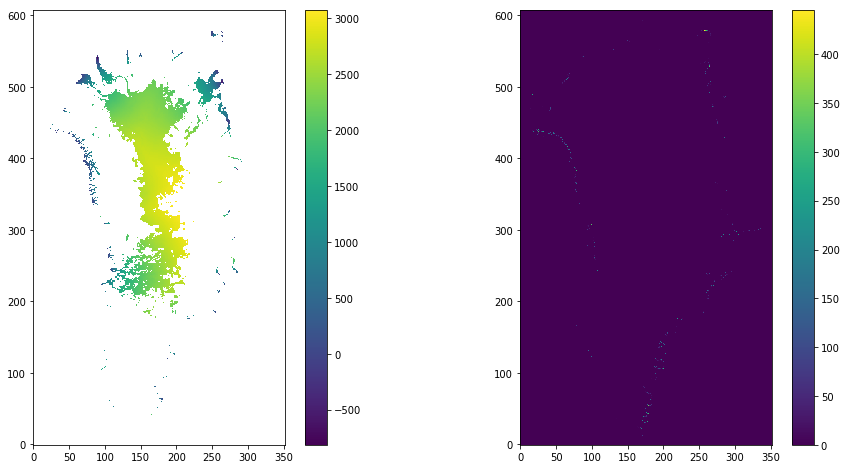

In [139]:
f,ax = plt.subplots(1,2, figsize = (16,8))
css = ax[0].imshow(d2['height_above_flotation'].values.mean(axis = 0), origin = 'lower')
# cs1 = ax[1].imshow(haf_ground, origin = 'lower')
cs1 = ax[1].imshow(vol_frac.values.mean(axis =0), origin = 'lower')

f.colorbar(css, ax = ax[0])
f.colorbar(cs1, ax = ax[1])

In [92]:
np.nanmean(d2['height_above_flotation'].values, axis = (0,1,2,))

2272.1487

In [93]:
np.nanmean(haf_ground)

2282.9126

In [284]:
t300

Dataset of 40 variables
0 / time (330): 31104000.0 to 10264320000.0
1 / nv (2): 0 to 1
pism_config: 0
run_stats: 0.0
time_bounds: ('time', 'nv')
basal_mass_flux_floating: ('time',)
basal_mass_flux_grounded: ('time',)
dt: ('time',)
ice_area_glacierized: ('time',)
ice_area_glacierized_cold_base: ('time',)
ice_area_glacierized_floating: ('time',)
ice_area_glacierized_grounded: ('time',)
ice_area_glacierized_temperate_base: ('time',)
ice_enthalpy: ('time',)
ice_enthalpy_glacierized: ('time',)
ice_mass: ('time',)
ice_mass_glacierized: ('time',)
ice_volume: ('time',)
ice_volume_cold: ('time',)
ice_volume_glacierized: ('time',)
ice_volume_glacierized_cold: ('time',)
ice_volume_glacierized_floating: ('time',)
ice_volume_glacierized_grounded: ('time',)
ice_volume_glacierized_temperate: ('time',)
ice_volume_temperate: ('time',)
limnsw: ('time',)
liquified_ice_flux: ('time',)
max_diffusivity: ('time',)
max_hor_vel: ('time',)
sea_level_rise_potential: ('time',)
surface_accumulation_rate: ('time',)

In [319]:
t2['ice_volume_glacierized'].values[1] -t2['ice_volume_glacierized_grounded'].values[1] -t2['ice_volume_glacierized_floating'].values[1]

0.1552734375

In [289]:
t2

Dataset of 40 variables
0 / time (12): 2592000.0 to 31104000.0
1 / nv (2): 0 to 1
pism_config: 0
run_stats: 0.0
time_bounds: ('time', 'nv')
basal_mass_flux_floating: ('time',)
basal_mass_flux_grounded: ('time',)
dt: ('time',)
ice_area_glacierized: ('time',)
ice_area_glacierized_cold_base: ('time',)
ice_area_glacierized_floating: ('time',)
ice_area_glacierized_grounded: ('time',)
ice_area_glacierized_temperate_base: ('time',)
ice_enthalpy: ('time',)
ice_enthalpy_glacierized: ('time',)
ice_mass: ('time',)
ice_mass_glacierized: ('time',)
ice_volume: ('time',)
ice_volume_cold: ('time',)
ice_volume_glacierized: ('time',)
ice_volume_glacierized_cold: ('time',)
ice_volume_glacierized_floating: ('time',)
ice_volume_glacierized_grounded: ('time',)
ice_volume_glacierized_temperate: ('time',)
ice_volume_temperate: ('time',)
limnsw: ('time',)
liquified_ice_flux: ('time',)
max_diffusivity: ('time',)
max_hor_vel: ('time',)
sea_level_rise_potential: ('time',)
surface_accumulation_rate: ('time',)
surf